In [145]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from scipy import stats
import pylab as pl
import pandas as pd
from sklearn.dummy import DummyClassifier



### Read in the csv file and display the dataframe

In [146]:
import pandas as pd
# Read in data and display first 5 rows
df = pd.read_csv('/Users/viviensong/Downloads/archive (1)/crime_in_la.csv')
df.head(5)

,DR_NO,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,LOCATION,LAT,LON
0,10304468,08/01/2020,22:30,3,Southwest,377,624,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,B,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,1100 W 39TH PL,34.0141,-118.2978
1,190101086,01/01/2020,03:30,1,Central,163,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,H,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,700 S HILL ST,34.0459,-118.2545
2,191501505,01/01/2020,17:30,15,N Hollywood,1543,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76,F,W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,5400 CORTEEN PL,34.1685,-118.4019
3,191921269,01/01/2020,04:15,19,Mission,1998,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,31,X,X,BEAUTY SUPPLY STORE,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,14400 TITUS ST,34.2198,-118.4468
4,200100501,01/01/2020,00:30,1,Central,163,121,"RAPE, FORCIBLE",0413 1822 1262 1415,25,F,H,NIGHT CLUB (OPEN EVENINGS ONLY),500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,700 S BROADWAY,34.0452,-118.2534


### Feature selection, target, and split into numberican and catagorical features. 

In [147]:
# create feature list and separate into catagorical and numerical features as well as identify a target (this case time)
feature_list = ['Vict Sex',
            'Vict Descent','Weapon Used Cd', 'TIME OCC', 'Crm Cd', 'AREA', 'Vict Age', 'LOCATION', 'Mocodes']
target = 'AREA'
# Categorical features
cat = ['Vict Sex','Vict Descent', 'TIME OCC', 'LOCATION', 'Mocodes']
# Numeric features
num = ['Crm Code', 'AREA', 'Weapon Used Cd', 'Vict Age']

In [148]:
# create data frame from feature list
temp = df[feature_list]
temp

,Vict Sex,Vict Descent,Weapon Used Cd,TIME OCC,Crm Cd,AREA,Vict Age,LOCATION,Mocodes
0,F,B,400.0,22:30,624,3,36,1100 W 39TH PL,0444 0913
1,M,H,500.0,03:30,624,1,25,700 S HILL ST,0416 1822 1414
2,F,W,500.0,17:30,745,15,76,5400 CORTEEN PL,0329 1402
3,X,X,500.0,04:15,740,19,31,14400 TITUS ST,0329
4,F,H,500.0,00:30,121,1,25,700 S BROADWAY,0413 1822 1262 1415
...,...,...,...,...,...,...,...,...,...
495405,M,W,500.0,01:00,341,19,37,14000 BALBOA BL,0344 1822
495406,F,H,500.0,12:10,421,19,48,8400 VAN NUYS BL,1822 1402
495407,X,X,500.0,15:30,510,10,0,18800 SHERMAN WY,0
495408,X,X,500.0,20:00,510,11,0,4000 FOUNTAIN AV,0


In [149]:
# drop null values
temp = temp.dropna()
temp

,Vict Sex,Vict Descent,Weapon Used Cd,TIME OCC,Crm Cd,AREA,Vict Age,LOCATION,Mocodes
0,F,B,400.0,22:30,624,3,36,1100 W 39TH PL,0444 0913
1,M,H,500.0,03:30,624,1,25,700 S HILL ST,0416 1822 1414
2,F,W,500.0,17:30,745,15,76,5400 CORTEEN PL,0329 1402
3,X,X,500.0,04:15,740,19,31,14400 TITUS ST,0329
4,F,H,500.0,00:30,121,1,25,700 S BROADWAY,0413 1822 1262 1415
...,...,...,...,...,...,...,...,...,...
495405,M,W,500.0,01:00,341,19,37,14000 BALBOA BL,0344 1822
495406,F,H,500.0,12:10,421,19,48,8400 VAN NUYS BL,1822 1402
495407,X,X,500.0,15:30,510,10,0,18800 SHERMAN WY,0
495408,X,X,500.0,20:00,510,11,0,4000 FOUNTAIN AV,0


Label encode the

In [150]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical variable
for col in cat:
    temp[col] = label_encoder.fit_transform(temp[col])

# Display the first few rows of the encoded dataframe
temp.head()


,Vict Sex,Vict Descent,Weapon Used Cd,TIME OCC,Crm Cd,AREA,Vict Age,LOCATION,Mocodes
0,0,1,400.0,1349,624,3,36,4590,60948
1,2,6,500.0,209,624,1,25,41655,54356
2,0,16,500.0,1049,745,15,76,36174,13030
3,3,17,500.0,254,740,19,31,11991,9190
4,0,6,500.0,29,121,1,25,41620,48711


In [151]:
# Function to categorize age into decades
def categorize_decade(age):
    return (age // 10) * 10
ages = temp['Vict Age']
# Create a new column 'Decade' based on the decade labels
temp['Vict Age'] = ages.apply(categorize_decade)
# temp = temp[temp['Vict Age'] != 0]
temp


,Vict Sex,Vict Descent,Weapon Used Cd,TIME OCC,Crm Cd,AREA,Vict Age,LOCATION,Mocodes
0,0,1,400.0,1349,624,3,30,4590,60948
1,2,6,500.0,209,624,1,20,41655,54356
2,0,16,500.0,1049,745,15,70,36174,13030
3,3,17,500.0,254,740,19,30,11991,9190
4,0,6,500.0,29,121,1,20,41620,48711
...,...,...,...,...,...,...,...,...,...
495405,2,16,500.0,59,341,19,30,11537,31734
495406,0,6,500.0,729,421,19,40,46210,154717
495407,3,17,500.0,929,510,10,0,18094,0
495408,3,17,500.0,1199,510,11,0,31127,0


In [152]:
# # Bin Times into hour blocks
# # temp['TIME OCC'] = pd.to_datetime(temp['TIME OCC']).dt.hour
# # helper to categorize hour into hour blocks
# def categorize_hour(hour):
#     return hour
# temp['TIME OCC'] = temp['TIME OCC'].apply(categorize_hour)
# temp


In [153]:
# Use numpy to convert to arrays
import numpy as np

# Labels are values we want to predict
labels = np.array(temp['AREA'])

# Remove the labels from the features
# axis 1 refers to the columns
features = temp.drop('AREA', axis=1)

# Saving feature names for later
feature_x = list(features.columns)

# Convert to numpy array
features = np.array(features)

from sklearn.ensemble import RandomForestClassifier

In [154]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2,
                                                                           random_state = 42)

In [155]:
# Define a range of numbers of decision trees
num_trees_list = []
for i in range (1, 50, 2):
        num_trees_list.append(i)

# Create an empty dictionary to store the classifiers and their accuracies
classifiers = {}

# Iterate through different numbers of trees
for num_trees in num_trees_list:
    # Create a random forest classifier with the current number of trees
    rf_classifier = RandomForestClassifier(max_depth=num_trees, random_state=42)

    # Train the classifier
    rf_classifier.fit(train_features, train_labels)

    # Make predictions on the test set
    y_pred = rf_classifier.predict(test_features)

    # Calculate accuracy and store the classifier
    from sklearn.metrics import accuracy_score
    accuracy = accuracy_score(test_labels, y_pred)
    classifiers[num_trees] = {'classifier': rf_classifier, 'accuracy': accuracy}

# Display the accuracies for each classifier
for num_trees, result in classifiers.items():
    print(f"Max depth for each tree: {num_trees}, Accuracy: {result['accuracy']}")

: 

: 

In [ ]:
# # Using Skicit-learn to split data into training and testing sets
# from sklearn.model_selection import train_test_split

# # Split the data into training and testing sets
# train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=42)

# # import Random Forest classifier
# from sklearn.ensemble import RandomForestClassifier

# # instantiate the classifier # estimators is num of decision trees
# rfc = RandomForestClassifier(n_estimators=180, max_features=8, max_depth=23, random_state=42)

# # fit the model
# rfc.fit(train_features, train_labels)

# # Predict the Test set results
# label_pred = rfc.predict(test_features)

# # Check accuracy score
# from sklearn.metrics import accuracy_score
# print('Model accuracy score with 100 decision-trees: {0:0.4f}'.format(accuracy_score(test_labels, label_pred)))


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(test_labels, label_pred))

              precision    recall  f1-score   support

           1       0.84      0.87      0.86      6154
           2       0.79      0.75      0.77      4456
           3       0.78      0.81      0.79      5438
           4       0.71      0.73      0.72      3785
           5       0.84      0.74      0.78      4172
           6       0.73      0.83      0.78      5406
           7       0.79      0.75      0.77      4664
           8       0.75      0.68      0.72      4693
           9       0.71      0.69      0.70      4230
          10       0.72      0.73      0.72      3988
          11       0.64      0.63      0.64      4294
          12       0.83      0.83      0.83      6320
          13       0.78      0.75      0.77      4844
          14       0.72      0.70      0.71      5840
          15       0.63      0.72      0.67      5124
          16       0.65      0.64      0.65      3405
          17       0.69      0.66      0.68      3861
          18       0.83    

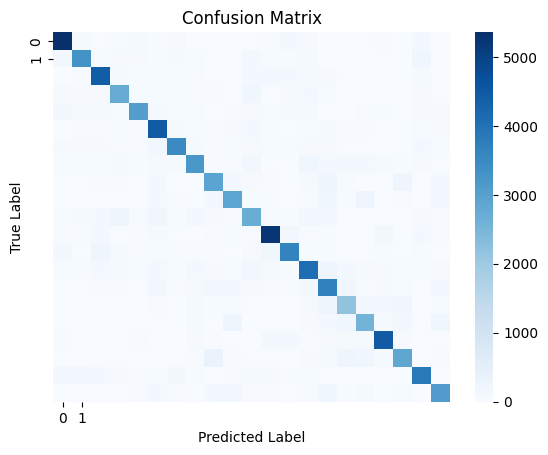

In [ ]:
from sklearn import metrics
cm = metrics.confusion_matrix(test_labels, label_pred)
sns.heatmap(cm, annot=None, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()